In [14]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# train test split

In [15]:
from keras.utils import image_dataset_from_directory

In [16]:
ds_train = image_dataset_from_directory('../data/french_bird_db_200_400', labels='inferred', image_size=(300, 300), validation_split=0.2, subset="training",
seed=42, batch_size=128)

ds_test = image_dataset_from_directory('../data/french_bird_db_200_400', labels='inferred', image_size=(300, 300), validation_split=0.2, subset="validation",
seed=42, batch_size=128)

Found 80000 files belonging to 200 classes.
Using 64000 files for training.
Found 80000 files belonging to 200 classes.
Using 16000 files for validation.


2024-07-01 10:46:36.606436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


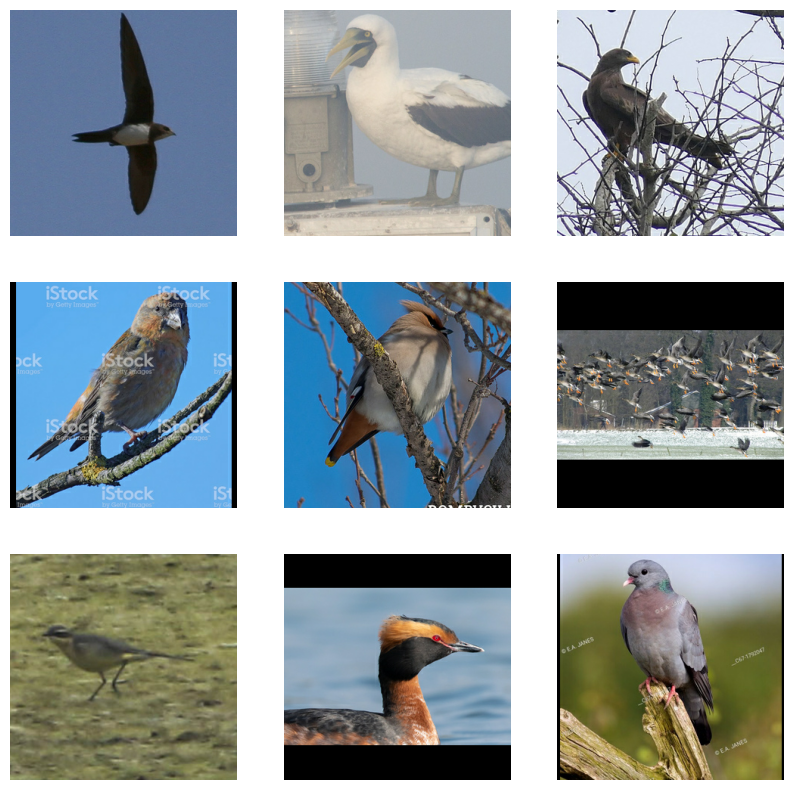

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [18]:
# Obtenir le nombre de classes à partir de ds
num_classes = len(ds_train.class_names)
print('Nombre de classes :', num_classes)

Nombre de classes : 200


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

In [20]:
import tensorflow as tf

# Convertir les étiquettes cibles en vecteurs one-hot
ds_train = ds_train.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
ds_test = ds_test.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

tf.config.list_physical_devices()

# Charger le modèle ResNet50 pré-entraîné avec les poids ImageNet
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Ajouter une couche de pooling global pour réduire la dimensionalité
x = base_model.output
x_2 = GlobalAveragePooling2D()(x)

x_3 = Dense(num_classes, activation='relu')(x_2)

# Ajouter une couche dense pour effectuer la classification
output = Dense(num_classes, activation='softmax')(x_3)

# Créer le modèle final en combinant le modèle de base et les couches supplémentaires
model = Model(inputs=base_model.input, outputs=output)

# Geler les couches du modèle de base pour éviter de les entraîner
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             TensorBoard(log_dir='./logs/batch-128', histogram_freq=0, write_graph=True, write_images=True)]

# # Finally fit the model
# model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
#           epochs=10, batch_size=64, callbacks=callbacks_2)

# Entraîner le modèle sur votre dataset avec le callback personnalisé

history = model.fit(ds_train, epochs=128, callbacks=callbacks, validation_data=ds_test)

Epoch 1/10
  9/500 ━━━━━━━━━━━━━━━━━━━━ 21:04 3s/step - accuracy: 0.0075 - loss: 145.0769

KeyboardInterrupt: 